In [19]:
# Dependencies and Setup (dont need most of these for now)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress
from matplotlib.ticker import ScalarFormatter
from pylab import *

data_file = "resources/travel.csv"
tsa_df = pd.read_csv(data_file)
del tsa_df["2019 Traveler Throughput"]
tsa_df = pd.DataFrame(tsa_df)[::-1]

tsa_df["Date"] = pd.to_datetime(tsa_df["Date"])
tsa_df

day = 1
week = ""

for index, row in tsa_df.iterrows():
    ofweek = ""
    for character in row["Day of Week"]:
        if character != ",":
            ofweek = ofweek + character
        else:
            tsa_df.loc[index, "Day of Week"] = ofweek
            break
    
    if day == 1:
        week = row["Date"]
        tsa_df.loc[index, "First Day of the Week"] = week
        day = day + 1
    elif day == 7:
        tsa_df.loc[index, "First Day of the Week"] = week
        day = 1
    else:
        tsa_df.loc[index, "First Day of the Week"] = week
        day = day + 1
        
tsa_df


,Date,Day of Week,2020 Traveler Throughput,First Day of the Week
305,2020-03-01,Sunday,2280522,2020-03-01
304,2020-03-02,Monday,2089641,2020-03-01
303,2020-03-03,Tuesday,1736393,2020-03-01
302,2020-03-04,Wednesday,1877401,2020-03-01
301,2020-03-05,Thursday,2130015,2020-03-01
...,...,...,...,...
4,2020-12-27,Sunday,1284599,2020-12-27
3,2020-12-28,Monday,1111751,2020-12-27
2,2020-12-29,Tuesday,1019347,2020-12-27
1,2020-12-30,Wednesday,1163696,2020-12-27


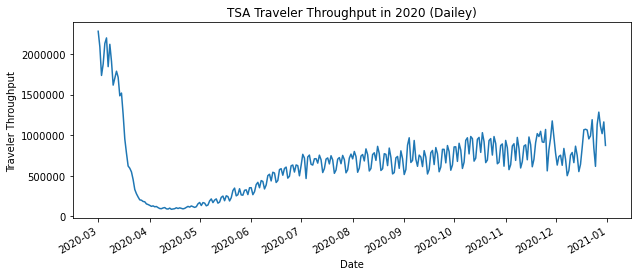

In [20]:
x = tsa_df["Date"]
y = tsa_df["2020 Traveler Throughput"]


plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.yticks(np.arange(0,2500000, 500000),np.arange(0,2500000, 500000))
plt.gcf().autofmt_xdate()
plt.title("TSA Traveler Throughput in 2020 (Dailey)")
plt.xlabel("Date")
plt.ylabel("Traveler Throughput")
plt.show()


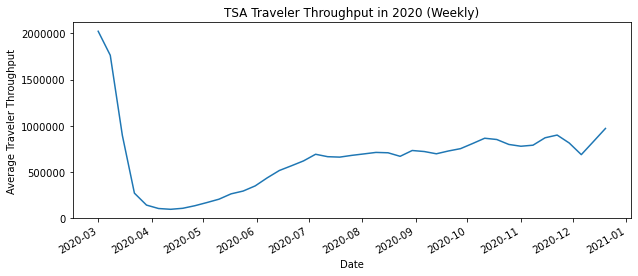

In [21]:
weekly_df = pd.DataFrame(tsa_df.groupby(["First Day of the Week"])["2020 Traveler Throughput"].mean())
weekly_df.reset_index(level=0, inplace=True)
weekly_df = weekly_df.sort_values(["First Day of the Week"], ascending=True)
weekly_df = weekly_df.drop(weekly_df.index[43])

x = weekly_df["First Day of the Week"]
y = weekly_df["2020 Traveler Throughput"]


plt.figure(figsize=(10,4))
plt.plot(x,y)
plt.yticks(np.arange(0,2500000, 500000),np.arange(0,2500000, 500000))
plt.gcf().autofmt_xdate()
plt.title("TSA Traveler Throughput in 2020 (Weekly)")
plt.xlabel("Date")
plt.ylabel("Average Traveler Throughput")
plt.show()
